# UFO Question 

Our data science team has predicted that the Earth is going to be invaded by an alien force in the
next years. Our only hope is to replicate a device that can block all alien technology in a radius of
~300km. Sadly, the device was sold in 2004 to an anonymous buyer to protect her hometown and
we don't know how contact her again. We know that the device has been active since 2004 in one
city in the USA, and we want to know where to start our search.
We've included a dataset called ​ufo.csv​. This dataset contains over 80,000 reports of UFO sightings
over the last century (all of them verified by the ESA). Using this dataset, try to guess the city in
which the device has been hidden.


In [1]:
%pip install pymongo
%pip install folium

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from pymongo import MongoClient

client = MongoClient()

import pandas as pd

import re
import folium

import warnings
warnings.filterwarnings('ignore')

import pylab as plt
import seaborn as sns


In [3]:
db=client.UFO

In [4]:
colec=db.UFO

In [5]:
ufo = list(colec.find())

In [6]:
df=pd.DataFrame(ufo)

df.info(memory_usage='deep')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78509 entries, 0 to 78508
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          78509 non-null  object
 1                78509 non-null  object
 2   datetime     78509 non-null  object
 3   city         78509 non-null  object
 4   state        72714 non-null  object
 5   country      68947 non-null  object
 6   shape        76599 non-null  object
 7   duration     78509 non-null  object
 8   total_time   78509 non-null  object
 9   comments     78495 non-null  object
 10  date_posted  78509 non-null  object
 11  latitude     78509 non-null  object
 12  longitude    78509 non-null  object
 13  year         78509 non-null  object
 14  distance     78509 non-null  object
dtypes: object(15)
memory usage: 75.5 MB


In [7]:
def check_nan(df):
    
    nan_cols=df.isna().mean() * 100
    
    display(f'N nan cols: {len(nan_cols[nan_cols>0])}')
    display(nan_cols[nan_cols>0])
    
    plt.figure(figsize=(10, 6))

    sns.heatmap(df.isna(),  
                yticklabels=False,
                cmap='viridis',
                cbar=False)
    
    plt.show();

'N nan cols: 4'

state        7.381319
country     12.179495
shape        2.432842
comments     0.017832
dtype: float64

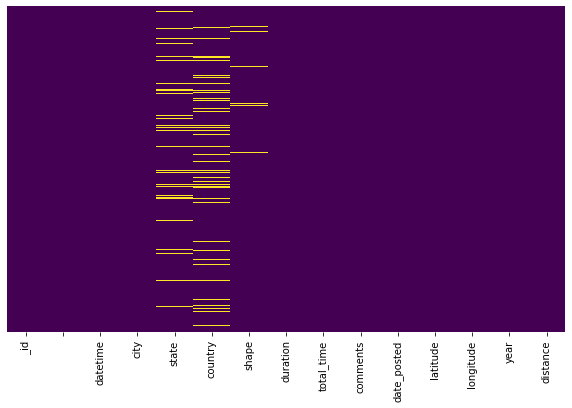

In [8]:
check_nan(df)

In [9]:
data = df[['city', 'latitude', 'longitude', 'year','distance','country']]


data = data[(data.country=='us')]

In [10]:
data.year=df.year.astype(dtype='int64')
data.distance=df.distance.astype(dtype='float64')

In [11]:
def geo_loc(df):    # funcion para insetar columna con punto de geolocalización.

    
    df.insert(2, 'geo_loc', pd.Series(list(range(len(df)))))
    df['geo_loc']=df.apply(lambda x: [x['longitude'], x['latitude']], axis=1)
    
    return data

In [12]:
geo_loc(data)

data

city    latitude                     geo_loc     longitude  year  \
0      san marcos  29.8830556   [-97.9411111, 29.8830556]   -97.9411111  2004   
3            edna  28.9783333   [-96.6458333, 28.9783333]   -96.6458333  2004   
4         kaneohe  21.4180556  [-157.8036111, 21.4180556]  -157.8036111  2004   
5         bristol      36.595       [-82.1888889, 36.595]   -82.1888889  2007   
7         norwalk     41.1175      [-73.4083333, 41.1175]   -73.4083333  1999   
...           ...         ...                         ...           ...   ...   
78504   woodstock  34.1013889   [-84.5194444, 34.1013889]   -84.5194444  2013   
78505       boise  43.6136111     [-116.2025, 43.6136111]     -116.2025  2013   
78506        napa  38.2972222  [-122.2844444, 38.2972222]  -122.2844444  2013   
78507      vienna  38.9011111   [-77.2655556, 38.9011111]   -77.2655556  2013   
78508      edmond  35.6527778   [-97.4777778, 35.6527778]   -97.4777778  2013   

          distance country  
0      1242.667772      us  
3      1211.971352      us  
4      6960.923396      us  
5       427.334113      us  
7      1295.827792      us  
...            ...     ...  
78504   318.719195      us  
78505  2620.021539      us  
78506  3126.991417      us  
78507   904.740389      us  
78508   953.748462      us  

[63399 rows x 7 columns]

In [13]:
def geomap(df, zoom_start=1.5):

    df.index=range(len(df)) 

    mapa=folium.Map(location=[0, 0],
                tiles='openstreetmap', zoom_start=zoom_start)

    for i in range(1, len(df)):

        folium.CircleMarker([float(df.latitude[i]), float(df.longitude[i])], popup=str(df.city[i]), 
                             radius=1, icon=folium.Icon()).add_to(mapa)

    mapa.save('images/geomap.html')
    
    
    return mapa

In [14]:
print('Avistamientos de Ovnis.')

mapa=geomap(data.loc[:1500])
mapa

Avistamientos de Ovnis.


In [28]:
print('La máquina perdidad está dentro del circulos')

mapa=geomap(data[(data.distance <400) & (data.year >= 2004)])
mapa

La máquina perdidad está dentro del circulos
